# Scikit-Learn and Algorithms

In [1]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv("Pearson.csv")
data

,Father,Son
0,65.0,59.8
1,63.3,63.2
2,65.0,63.3
3,65.8,62.8
4,61.1,64.3
...,...,...
1073,67.0,70.8
1074,71.3,68.3
1075,71.8,69.3
1076,70.7,69.3


In [5]:
x = data["Father"].values.reshape(-1,1)
y = data["Son"].values
x

array([[65. ],
       [63.3],
       [65. ],
       ...,
       [71.8],
       [70.7],
       [70.3]])

In [7]:
y

array([59.8, 63.2, 63.3, ..., 69.3, 69.3, 67. ])

### Regression

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
model = LinearRegression()

In [14]:
model.fit(x,y)

LinearRegression()

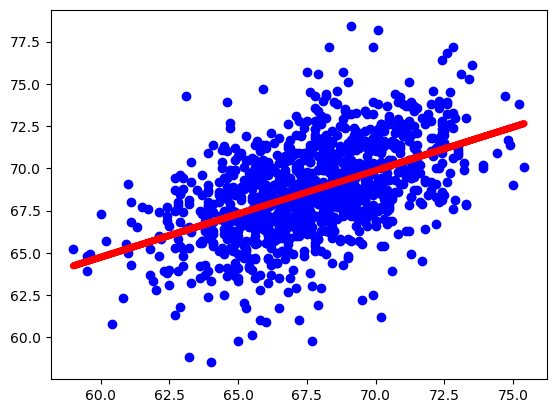

In [16]:
import matplotlib.pyplot as plt

plt.scatter(x,y,color='blue')
plt.plot(x,model.predict(x),color='red',linewidth=5)
plt.show()

In [17]:
from sklearn.preprocessing import PolynomialFeatures

In [20]:
poly = PolynomialFeatures(degree=7)     # you can adjust degree according to what you need curve like 5 or 2
x_poly = poly.fit_transform(x)
poly.fit(x_poly,y)

lin_alg_poly = LinearRegression()
lin_alg_poly.fit(x_poly,y)

LinearRegression()

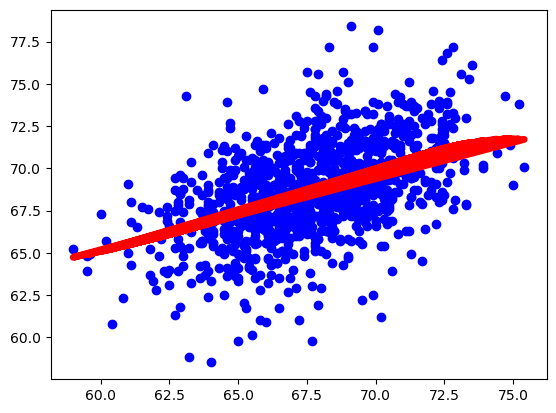

In [22]:
import matplotlib.pyplot as plt

plt.scatter(x,y,color='blue')
plt.plot(x,lin_alg_poly.predict(poly.fit_transform(x)),color='red',linewidth=5)   # we can also use "x_poly" instead of "fit_transform(x)".
plt.show()

In [24]:
import pandas as pd

dataset = pd.read_csv("Student_performance_data _.csv")
dataset

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,1095,16,1,0,1,6.414243,4,0,1,1,1,0,0,2.708472,2
95,1096,16,1,2,3,19.278320,29,0,3,0,0,0,1,0.732908,4
96,1097,16,1,1,1,12.831594,29,0,4,0,0,1,0,0.965482,4
97,1098,18,0,0,2,0.468659,5,0,2,0,1,0,0,2.555233,2


In [26]:
x = dataset.iloc[:,0:13].values
y = dataset.iloc[:,14].values

In [28]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [30]:
from sklearn.preprocessing import PolynomialFeatures

multi_poly = PolynomialFeatures(degree=4)
x_poly = multi_poly.fit_transform(x_train)
multi_poly.fit(x_poly, y_train)

PolynomialFeatures(degree=4)

In [32]:
from sklearn.linear_model import LinearRegression
lin_reg_multi = LinearRegression()
lin_reg_multi.fit(x_poly,y_train)

LinearRegression()

In [34]:
y_pred = lin_reg_multi.predict(multi_poly.fit_transform(x_test))

from sklearn import metrics
print(metrics.mean_squared_error(y_test,y_pred))

0.8197740091123883


### Classification

In [37]:
import pandas as pd

In [39]:
dataset = pd.read_csv("Cancer_data.csv")
dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.71190,0.26540,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.24160,0.18600,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.45040,0.24300,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.68690,0.25750,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.40000,0.16250,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,914102,B,13.16,20.54,84.06,538.7,0.07335,0.05275,0.01800,0.01256,...,14.50,28.46,95.29,648.3,0.1118,0.1646,0.07698,0.04195,0.2687,0.07429
495,914333,B,14.87,20.21,96.12,680.9,0.09587,0.08345,0.06824,0.04951,...,16.01,28.48,103.90,783.6,0.1216,0.1388,0.17000,0.10170,0.2369,0.06599
496,914366,B,12.65,18.17,82.69,485.6,0.10760,0.13340,0.08017,0.05074,...,14.38,22.15,95.29,633.7,0.1533,0.3842,0.35820,0.14070,0.3230,0.10330
497,914580,B,12.47,17.31,80.45,480.1,0.08928,0.07630,0.03609,0.02369,...,14.06,24.34,92.82,607.3,0.1276,0.2506,0.20280,0.10530,0.3035,0.07661


In [41]:
len(dataset.columns)

32

In [43]:
x = dataset.iloc[:, 2:29].values
y = dataset.iloc[:, 1].values
x

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 1.622e-01, 6.656e-01,
        7.119e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.238e-01, 1.866e-01,
        2.416e-01],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 1.444e-01, 4.245e-01,
        4.504e-01],
       ...,
       [1.265e+01, 1.817e+01, 8.269e+01, ..., 1.533e-01, 3.842e-01,
        3.582e-01],
       [1.247e+01, 1.731e+01, 8.045e+01, ..., 1.276e-01, 2.506e-01,
        2.028e-01],
       [1.849e+01, 1.752e+01, 1.213e+02, ..., 1.412e-01, 3.089e-01,
        3.533e-01]])

In [45]:
y

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M

In [47]:
from sklearn.model_selection import train_test_split

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [51]:
from sklearn.preprocessing import StandardScaler

In [53]:
scaler = StandardScaler()
scaler

StandardScaler()

In [55]:
x_train = scaler.fit_transform(x_train)
x_train

array([[-0.34694591, -0.83781444, -0.31198234, ..., -0.03792366,
         0.09341416, -0.4533129 ],
       [-0.57761985,  2.62950951, -0.65035219, ..., -1.65633108,
        -1.31729438, -1.36462475],
       [-0.23018503,  0.76454635, -0.25922796, ..., -0.69438962,
        -0.5729293 , -0.26430007],
       ...,
       [-0.64311986,  2.18454438, -0.67384437, ..., -1.22393883,
        -1.03492743, -1.09827096],
       [-0.0222937 ,  0.96392963,  0.04823112, ...,  0.92926953,
         4.19220853,  2.72808158],
       [ 0.21692372,  0.16396499,  0.29263225, ...,  1.00804544,
         0.98625183,  1.1441348 ]])

In [57]:
x_test = scaler.fit_transform(x_test)
x_test

array([[-0.49067885, -0.19960739, -0.51319913, ..., -0.33505495,
        -0.32924537, -0.51971582],
       [-1.10903425, -1.51024228, -1.08421722, ...,  0.12808214,
        -0.42383343, -0.76328214],
       [ 0.3399478 ,  0.22347474,  0.25763019, ..., -1.21186789,
        -0.84817502, -0.80415215],
       ...,
       [ 0.19535724, -1.81605709,  0.20260317, ..., -0.00681216,
        -0.33381169,  0.03923464],
       [ 0.69065683, -0.16971572,  0.69062969, ..., -0.00231569,
        -0.04156721,  0.15357615],
       [ 0.56760103, -1.11705181,  0.55080694, ..., -0.41149506,
        -0.22878633, -0.3628506 ]])

In [59]:
from sklearn.linear_model import LogisticRegression

In [61]:
logistic_classifier = LogisticRegression()
logistic_classifier

LogisticRegression()

In [63]:
logistic_classifier.fit(x_train, y_train)

LogisticRegression()

In [65]:
y_preds = logistic_classifier.predict(x_test)
from sklearn.metrics import confusion_matrix  # confusion matrix : what type of misclassification our model is performing
print(confusion_matrix(y_test, y_preds))

[[60  9]
 [ 2 29]]


###### 55 and 40 represents the number of correct predictions ,
###### 5 and 0 represents the incorrect prediction
###### A confusion matrix : help interpret what each number means.
###### "positive = benign"
###### "negative = malignant"
###### Top-left (55) → True Positives (TP): Correctly predicted benign.
###### Top-right (0) → False Positives (FP): Predicted benign, but actually malignant.
###### Bottom-left (5) → False Negatives (FN): Predicted malignant, but actually benign.
###### Bottom-right (40) → True Negatives (TN): Correctly predicted malignant.

In [68]:
from sklearn.svm import SVC  # svm = support vector machine, SVC = Support Vector Classification, SVR = SVRegression

In [70]:
svm = SVC(kernel='rbf') 
svm      # rbf stands for Radial Basis Function, and it's one of the most popular kernel functions used in Support Vector Machines (SVM).

SVC()

##### SVM tries to find the best hyperplane (line, plane, etc.) that separates the data. But what if the data is not linearly separable in its current space?
##### That’s where kernels come in — they transform your data into a higher-dimensional space where it is separable.

In [73]:
svm.fit(x_train, y_train)

SVC()

In [75]:
y_preds = svm.predict(x_test)
from sklearn.metrics import confusion_matrix  # confusion matrix : what type of misclassification our model is performing
print(confusion_matrix(y_test, y_preds))

[[61  8]
 [ 1 30]]


In [77]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
tree = DecisionTreeClassifier(criterion='entropy')
tree

DecisionTreeClassifier(criterion='entropy')

In [81]:
tree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [83]:
y_preds = tree.predict(x_test)
from sklearn.metrics import confusion_matrix  # confusion matrix : what type of misclassification our model is performing
print(confusion_matrix(y_test, y_preds))

[[61  8]
 [ 5 26]]


In [85]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
forest = RandomForestClassifier(n_estimators=100,criterion='entropy')
forest

RandomForestClassifier(criterion='entropy')

In [89]:
forest.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy')

In [90]:
y_preds = forest.predict(x_test)
from sklearn.metrics import confusion_matrix  # confusion matrix : what type of misclassification our model is performing
print(confusion_matrix(y_test, y_preds))

[[58 11]
 [ 3 28]]


### Boosting and Optimization

In [94]:
import pandas as pd

data = pd.read_csv("Cancer_Data.csv")
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.71190,0.26540,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.24160,0.18600,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.45040,0.24300,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.68690,0.25750,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.40000,0.16250,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,914102,B,13.16,20.54,84.06,538.7,0.07335,0.05275,0.01800,0.01256,...,14.50,28.46,95.29,648.3,0.1118,0.1646,0.07698,0.04195,0.2687,0.07429
495,914333,B,14.87,20.21,96.12,680.9,0.09587,0.08345,0.06824,0.04951,...,16.01,28.48,103.90,783.6,0.1216,0.1388,0.17000,0.10170,0.2369,0.06599
496,914366,B,12.65,18.17,82.69,485.6,0.10760,0.13340,0.08017,0.05074,...,14.38,22.15,95.29,633.7,0.1533,0.3842,0.35820,0.14070,0.3230,0.10330
497,914580,B,12.47,17.31,80.45,480.1,0.08928,0.07630,0.03609,0.02369,...,14.06,24.34,92.82,607.3,0.1276,0.2506,0.20280,0.10530,0.3035,0.07661


In [96]:
x = data.iloc[:, 2:29].values
y = data.iloc[:, 1].values

In [98]:
from sklearn.model_selection import train_test_split

In [100]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [102]:
from sklearn.preprocessing import StandardScaler

In [104]:
s = StandardScaler()
s

StandardScaler()

In [106]:
x_train = s.fit_transform(x_train)
x_test = s.fit_transform(x_test)

In [108]:
print(x_train)

[[-1.0545961   0.06480209 -1.02779307 ... -0.43948508 -0.65217711
  -0.91200294]
 [ 0.40183777  0.22962917  0.4453255  ...  1.61804485  0.84533034
   1.3114334 ]
 [-0.56232145 -0.28666741 -0.59078333 ... -0.79131379 -0.9916615
  -1.05263086]
 ...
 [-0.58562439 -0.31575454 -0.57899501 ...  0.50911638 -0.47509238
  -0.53585717]
 [-0.61766594  1.42220156 -0.59836153 ... -0.02976051 -0.4448584
  -0.53305115]
 [ 0.14841828  1.21131986  0.11567365 ... -0.90265199 -0.47941152
  -0.85578918]]


In [110]:
from sklearn.decomposition import PCA  # PCA : Principle Component Analysis

In [112]:
pca = PCA(n_components=1)  
pca

PCA(n_components=1)

In [114]:
x_train_scaled = pca.fit_transform(x_train)
print(x_train_scaled[:10])

[[-2.31820933]
 [ 3.72843056]
 [-2.18171733]
 [-5.1261331 ]
 [ 7.38529073]
 [ 3.08211957]
 [ 5.12088183]
 [-2.25765541]
 [-4.23979138]
 [-2.63158384]]


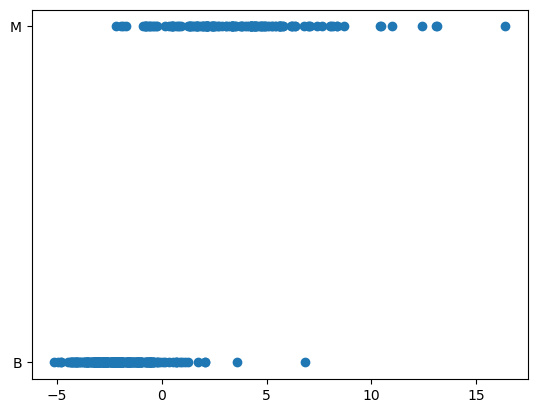

In [116]:
import matplotlib.pyplot as plt
plt.scatter(x_train_scaled, y_train)
plt.show()

In [118]:
from sklearn.ensemble import GradientBoostingClassifier

In [120]:
gradientboosting = GradientBoostingClassifier()

In [122]:
gradientboosting.fit(x_train, y_train)

GradientBoostingClassifier()

In [123]:
y_preds = gradientboosting.predict(x_test)
from sklearn.metrics import confusion_matrix  # confusion matrix : what type of misclassification our model is performing
print(confusion_matrix(y_test, y_preds))

[[52  0]
 [ 4 44]]


###### 57 and 33 represents the number of correct predictions ,
###### 6 and 4 represents the incorrect prediction
###### A confusion matrix : help interpret what each number means.
###### "positive = benign"
###### "negative = malignant"
###### Top-left (57) → True Positives (TP): Correctly predicted benign.
###### Top-right (4) → False Positives (FP): Predicted benign, but actually malignant.
###### Bottom-left (6) → False Negatives (FN): Predicted malignant, but actually benign.
###### Bottom-right (33) → True Negatives (TN): Correctly predicted malignant.

In [127]:
from xgboost import XGBClassifier

In [129]:
xgboost = XGBClassifier()
xgboost

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [131]:
from sklearn.preprocessing import LabelEncoder
label_encode = LabelEncoder()
y_train_encoded = label_encode.fit_transform(y_train)
y_test_encoded = label_encode.transform(y_test)

##### Decode Back Later : If you ever want to convert predictions back to 'B' or 'M', just do:
###### y_preds = xgboost.predict(x_test)
###### decoded_preds = label_encoder.inverse_transform(y_preds)

In [134]:
xgboost.fit(x_train, y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [136]:
y_preds = xgboost.predict(x_test)
from sklearn.metrics import confusion_matrix  # confusion matrix : what type of misclassification our model is performing
print(confusion_matrix(y_test_encoded, y_preds))

[[52  0]
 [ 6 42]]
